In [104]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df1 = pd.read_csv(mouse_drug_data_to_load)
df2 = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

df = pd.merge(df2, df1, on="Mouse ID")
# Display the data table for preview

df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [105]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped = df.groupby(['Drug','Timepoint'])
tumorvolmean = grouped['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
tumorvolmeandf = pd.DataFrame(tumorvolmean)
# Preview DataFrame
tumorvolmeandf.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [106]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumorvolsem = grouped['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
tumorvolsemdf = pd.DataFrame(tumorvolsem)
# Preview DataFrame

tumorvolsemdf.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [107]:
tumorvolmeandf = tumorvolmeandf.unstack(level = 0)
tumorvolmeandf.columns = tumorvolmeandf.columns.get_level_values(1)
tumorvolmeandf

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [108]:
# Minor Data Munging to Re-Format the Data Frames
tumorvolsemdf = tumorvolsemdf.unstack(level = 0)
tumorvolsemdf.columns = tumorvolsemdf.columns.get_level_values(1)

# Preview that Reformatting worked
tumorvolsemdf

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


No handles with labels found to put in legend.


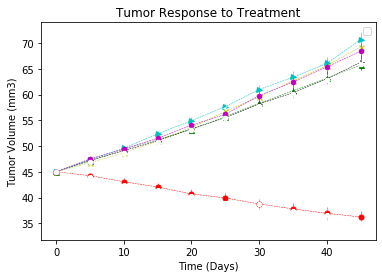

In [109]:
plt.errorbar(tumorvolmeandf.index, tumorvolmeandf['Capomulin'], yerr=tumorvolsemdf['Capomulin'],
             color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(tumorvolmeandf.index, tumorvolmeandf['Ceftamin'], yerr=tumorvolsemdf['Ceftamin'],
             color='1', marker="v", markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(tumorvolmeandf.index, tumorvolmeandf['Infubinol'], yerr=tumorvolsemdf['Infubinol'],
             color='g', marker='^', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(tumorvolmeandf.index, tumorvolmeandf['Ketapril'], yerr=tumorvolsemdf['Ketapril'],
             color='c', marker='>', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(tumorvolmeandf.index, tumorvolmeandf['Naftisol'], yerr=tumorvolsemdf['Naftisol'],
             color='y', marker='x', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(tumorvolmeandf.index, tumorvolmeandf['Placebo'], yerr=tumorvolsemdf['Placebo'],
             color='4', marker='3', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(tumorvolmeandf.index, tumorvolmeandf['Propriva'], yerr=tumorvolsemdf['Propriva'],
             color='0', marker='4', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(tumorvolmeandf.index, tumorvolmeandf['Ramicane'], yerr=tumorvolsemdf['Ramicane'],
             color='3', marker='8', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(tumorvolmeandf.index, tumorvolmeandf['Stelasyn'], yerr=tumorvolsemdf['Stelasyn'],
             color='m', marker='h', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(tumorvolmeandf.index, tumorvolmeandf['Zoniferol'], yerr=tumorvolsemdf['Zoniferol'],
             color='2', marker='H', markersize=5, linestyle='--', linewidth=0.5)

x_lim = len(tumorvolmeandf.index)
# Chart title
plt.title("Tumor Response to Treatment")
# x label
plt.xlabel("Time (Days)")
# y label
plt.ylabel("Tumor Volume (mm3)")
# legend 
plt.legend()
plt.show()

No handles with labels found to put in legend.


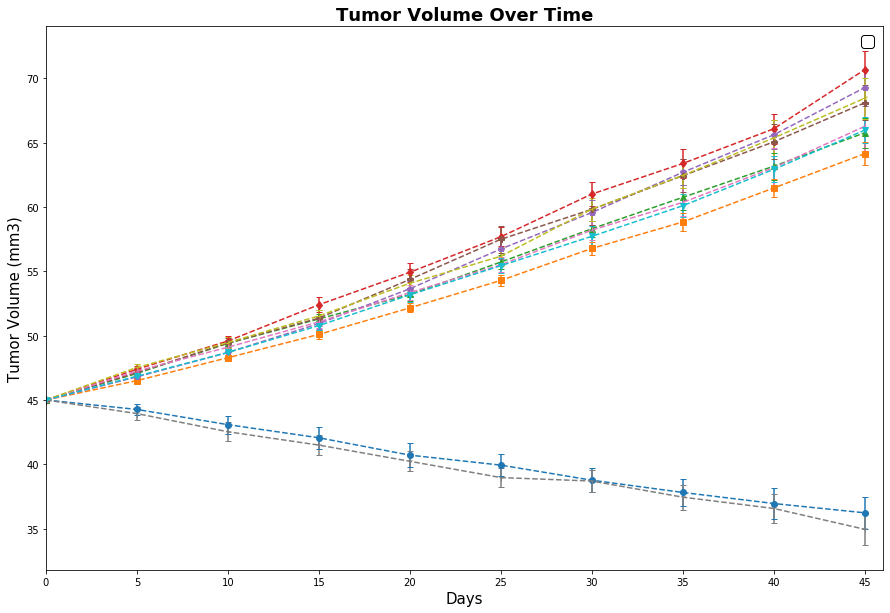

In [113]:
# Generate the Plot (with Error Bars)

plt.figure(figsize = (15,10))
plt.title('Tumor Volume Over Time', fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('Days', fontdict = {'fontsize': 15})
plt.ylabel('Tumor Volume (mm3)', fontdict = {'fontsize': 15})
plt.xticks(np.arange(0, tumorvolmeandf.index.max()+3 , 5))
plt.xlim(0, tumorvolmeandf.index.max() + 1)
markers = ['o', 's', '^', 'd', 'p', 'P', '2', '1', '3', "v"]
xvals = tumorvolmeandf.index

count = 0

for c in tumorvolmeandf.columns:
    plt.errorbar(xvals, 
                 tumorvolmeandf[c], 
                 tumorvolsemdf[c], 
                 linestyle = '--', 
                 marker =  markers[count], 
                 capthick = 1, 
                 capsize = 3)  
    count += 1
    
lg = plt.legend(numpoints = 2, # gives two symbols in legend
                frameon = True, 
                markerscale = 1.5, 
                edgecolor = 'black', 
                fontsize = '17', 
                framealpha = 1)

#plt.show()

# Save the Figure

plt.savefig('tumorvolovertime.png')

In [114]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [102]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)